In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('final_data.csv', sep=';')
data.head()

,BadgesNo,AttemptCount,Ah1,Ah2,Ah3,ActivityHistory,OtherModules,AtRisk,Book,Choice,...,Feedback,Forum,Glossary,Lesson,Page,Quiz,Survey,Wiki,Workshop,Results
0,0,1,0,0,0,0,1,1,1,1,...,0,0,0,0,2,1,0,0,0,0
1,1,2,6,0,0,1,2,1,3,1,...,1,2,1,0,7,2,1,1,1,0
2,2,1,6,6,1,3,3,0,4,1,...,2,3,1,1,12,5,1,1,1,1
3,2,1,6,6,1,3,4,0,4,1,...,2,3,1,1,12,5,1,1,1,1
4,1,3,0,0,0,0,2,1,3,1,...,1,2,1,0,7,2,1,1,0,0


In [3]:
data.shape

(1202, 21)

In [4]:
X = data[['BadgesNo','AttemptCount','Ah1','Ah2','Ah3','ActivityHistory','OtherModules','AtRisk','Book ', 'Choice', 'Data', 'Feedback','Forum','Glossary','Lesson','Page','Quiz','Survey','Wiki','Workshop'
        ]]
X.head()
y = data['Results']

In [5]:
train_x, test_x, train_y, test_y= train_test_split(data.drop("Results",axis=1),data.Results,test_size=0.2,random_state=41)

In [6]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

data_constant = constant_filter.fit_transform(train_x)
print(data_constant.shape)

constant_columns = [column for column in train_x.columns
                    if column not in train_x.columns[constant_filter.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

(961, 20)
0


In [7]:
data_cons = data.drop(constant_columns,axis=1)
data_cons.shape

(1202, 21)

In [8]:
qcons_filter = VarianceThreshold(threshold=0.01)

data_qcons = qcons_filter.fit_transform(train_x)
print(data_qcons.shape)

qcons_columns = [column for column in train_x.columns
                    if column not in train_x.columns[qcons_filter.get_support()]]

print(len(qcons_columns))

for column in qcons_columns:
    print(column)

(961, 20)
0


In [9]:
data_qcons = data.drop(qcons_columns,axis=1)
data_qcons.shape

(1202, 21)

In [10]:
data_qcons_t = data_qcons.T
data_qcons_t.shape

(21, 1202)

In [11]:
print(data_qcons_t.duplicated().sum())

0


In [12]:
data_cons_dup = data_qcons_t.drop_duplicates(keep='first').T
data_cons_dup.shape

(1202, 21)

In [13]:
for i in range(0,len(train_x.columns)):
    for j in  range(0,len(train_x.columns)):
        if i!=j:
            corr_1=np.abs(train_x[train_x.columns[i]].corr(train_x[train_x.columns[j]]))
            if corr_1 <0.3:
                print( train_x.columns[i] , " is not correlated  with ", train_x.columns[j])
            elif corr_1>0.75:
                print( train_x.columns[i] , " is highly  correlated  with ", train_x.columns[j])

BadgesNo  is not correlated  with  AttemptCount
BadgesNo  is highly  correlated  with  ActivityHistory
BadgesNo  is highly  correlated  with  AtRisk
BadgesNo  is highly  correlated  with  Feedback
BadgesNo  is highly  correlated  with  Forum
BadgesNo  is highly  correlated  with  Lesson
BadgesNo  is highly  correlated  with  Page
BadgesNo  is highly  correlated  with  Quiz
AttemptCount  is not correlated  with  BadgesNo
AttemptCount  is not correlated  with  Ah1
AttemptCount  is not correlated  with  Ah2
AttemptCount  is not correlated  with  Ah3
AttemptCount  is not correlated  with  ActivityHistory
AttemptCount  is not correlated  with  OtherModules
AttemptCount  is not correlated  with  AtRisk
AttemptCount  is not correlated  with  Book 
AttemptCount  is not correlated  with  Choice
AttemptCount  is not correlated  with  Data
AttemptCount  is not correlated  with  Feedback
AttemptCount  is not correlated  with  Forum
AttemptCount  is not correlated  with  Glossary
AttemptCount  is n

Workshop  is not correlated  with  AttemptCount
Workshop  is highly  correlated  with  Ah1
Workshop  is highly  correlated  with  Ah2
Workshop  is highly  correlated  with  ActivityHistory
Workshop  is not correlated  with  Choice


In [14]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y);

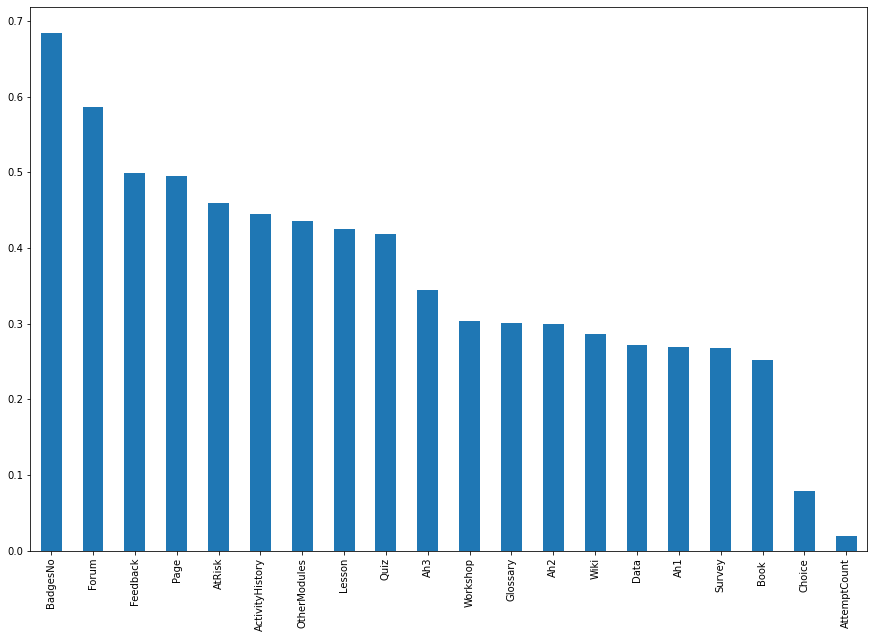

In [15]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(15, 10))